<a href="https://colab.research.google.com/github/yrb1802/Web_scraping_movies/blob/main/Mid_course_Module_2_Yashraj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**

**Name-** Yashraj Belchandan



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'
headers = {
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
'Accept-Language': 'en-US,en;q=0.9',
'Accept-Encoding': 'gzip, deflate, br',
'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}

# Sending an HTTP GET request to the URL
response=requests.get(url, headers= headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(response.text,'html.parser')

# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# fetching movie url
movie_url = []
for x in soup.find_all('a',attrs={'class':'title-list-grid__item--link'}):
  movie_url.append('https://www.justwatch.com'+x['href']) #append the url to movie url
print(movie_url)
print(len(movie_url))

['https://www.justwatch.com/in/movie/stree-2', 'https://www.justwatch.com/in/movie/deadpool-3', 'https://www.justwatch.com/in/movie/the-substance', 'https://www.justwatch.com/in/movie/khel-khel-mein', 'https://www.justwatch.com/in/movie/meiyazhagan', 'https://www.justwatch.com/in/movie/thalapathy-68', 'https://www.justwatch.com/in/movie/venom-3-2024', 'https://www.justwatch.com/in/movie/kill-2024', 'https://www.justwatch.com/in/movie/vedaa', 'https://www.justwatch.com/in/movie/stree', 'https://www.justwatch.com/in/movie/the-wild-robot', 'https://www.justwatch.com/in/movie/alien-romulus', 'https://www.justwatch.com/in/movie/tumbbad', 'https://www.justwatch.com/in/movie/siddharth-roy', 'https://www.justwatch.com/in/movie/longlegs', 'https://www.justwatch.com/in/movie/bhool-bhulaiyaa-3', 'https://www.justwatch.com/in/movie/untitled-soorarai-pottru-remake', 'https://www.justwatch.com/in/movie/ntr-30', 'https://www.justwatch.com/in/movie/mathu-vadalara', 'https://www.justwatch.com/in/movie/

## **Scrapping Movie Title**

In [ ]:
def extract_movie_name_from_url(url):
    return url.split('/')[-1]

# Extract movie names from the URLs
movie_names = [extract_movie_name_from_url(url) for url in movie_url]


In [ ]:
movie_names

['stree-2',
 'deadpool-3',
 'the-substance',
 'khel-khel-mein',
 'meiyazhagan',
 'thalapathy-68',
 'venom-3-2024',
 'kill-2024',
 'vedaa',
 'stree',
 'the-wild-robot',
 'alien-romulus',
 'tumbbad',
 'siddharth-roy',
 'longlegs',
 'bhool-bhulaiyaa-3',
 'untitled-soorarai-pottru-remake',
 'ntr-30',
 'mathu-vadalara',
 'vaazhai',
 'do-patti',
 'level-cross',
 'saripodhaa-sanivaaram',
 'thangalaan',
 'vettaiyan',
 'furiosa',
 'lubber-pandhu',
 'vicky-vidya-ka-woh-wala-video',
 'venom-2018',
 'kishkkindha-kandam',
 'martin',
 'ctrl-2024',
 'gaganachari',
 'jigra-2024',
 'munjha',
 'the-shadow-strays',
 'swag',
 'salaar',
 'strange-darling',
 'venom-let-there-be-carnage',
 'double-ismart',
 'kalki-2898-ad',
 '365-days',
 'black-2024',
 'its-whats-inside',
 'it-ends-with-us',
 'aavesham-2024',
 'inside-out-2',
 'challengers',
 'laila-majnu',
 'caddo-lake',
 'golam',
 'transformers-one-2024',
 'je-jatt-vigad-gya',
 'sector-36',
 'bhediya',
 'prisoners',
 'bhool-bhulaiyaa-2',
 'speak-no-evil-20

## **Scrapping release Year**

In [ ]:
release_years_list = []

for url in movie_url:
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }

        response = requests.get(url, headers=headers)

        # Check if request was successful
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Extract release year
            release_element = soup.find('span', class_='text-muted')

            if release_element:
                release_year = release_element.text.strip()
            else:
                release_year = "NA"  #  release year not found

        else:
            release_year = "NA"  # If request was not successful

    except Exception as e:
        print(f"Error processing {url}: {e}")
        release_year = "NA"  # If any exception occurs

    release_years_list.append(release_year)

# Print release years
print(release_years_list)
print(len(release_years_list))

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']
100


## Convert  Release year to string

In [ ]:
release_years = []
# Function to extract year from string
def extract_year(year_str):
    if not isinstance(year_str, str):
        return None
    match = re.search(r'\((\d{4})\)', year_str)
    return match.group(1) if match else 'NA'

# Append release years as strings to the list
for year in release_years_list:
    release_year = extract_year(year)
    release_years.append(str(release_year))

# Print the result
print(release_years)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## **Scrapping Genres**

In [ ]:
genre_list = []
for url in movie_url:
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }

        response = requests.get(url, headers=headers)

        # Check if request was successful
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Extract genres
            genres = []
            h3_element = soup.find('h3', class_='detail-infos__subheading', string='Genres')
            if h3_element:
                span_element = h3_element.find_next('span', class_='detail-infos__value')
                if span_element:
                    genres = [genre.strip() for genre in span_element.text.split(',')]
                else:
                    genres = ["Genre Not Listed"]
            else:
                genres = ["Genre Not Listed"]

        else:
            genres = ["NA"]  # If request was not successful

    except Exception as e:
        print(f"Error processing {url}: {e}")
        genres = ["NA"]  # If any exception occurs

    genre_list.append(genres)

# Print the scraped genres
print(genre_list)
print(len(genre_list))

[['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre N

## **Scrapping IMBD Rating**

In [ ]:
imdb_list = []

for url in movie_url:
    try:
        # Constructing the absolute URL for fetching each movie
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }

        response_g = requests.get(url, headers=headers)
        soup = BeautifulSoup(response_g.text, 'html.parser')

        # Selecting only those h3 whose heading is Rating
        h3_element = soup.find('h3', class_='detail-infos__subheading', string='Rating')

        if h3_element:
            # Check if the next sibling is a div with class "detail-infos__value"
            div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

            if div_element:
                inside_div = div_element.find_all('div', class_='jw-scoring-listing__rating')

                # Check if inside_div is non-empty
                if inside_div:
                    inside_div_last = inside_div[-1] # extracting last div of inside div as last div elemnt contains span (in which last span contains rating)

                    # Check if inside_div_last is non-empty
                    if inside_div_last:
                        span_all = inside_div_last.find_all('span')

                        # Check if span_all is non-empty
                        if span_all:
                            span_last = span_all[-1] # Here we are extracting rating from the last span(span_last) inside last div(inside_div_last) of main div_element(div_element)
                            imdb_list.append(span_last.text.strip())
                        else:
                            imdb_list.append("Imdb Rating Not Listed.")
                    else:
                        imdb_list.append("Imdb Rating Not Listed.")
                else:
                    imdb_list.append("Imdb Rating Not Listed.")
            else:
                imdb_list.append("Imdb Rating Not Listed.")
        else:
            imdb_list.append("Imdb Rating Not Listed.")

    except Exception as e:
        print(f"Error processing {url}: {e}")
        imdb_list.append("Imdb Rating Not Listed.")

# Print theIMDb ratings
print(imdb_list)
print(len(imdb_list))

['62%', 'Imdb Rating Not Listed.', '90%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '40%', 'Imdb Rating Not Listed.', '89%', '44%', '79%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '86%', 'Imdb Rating Not Listed.', '42%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '90%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '30%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '56%', '91%', 'Imdb Rating Not Listed.', '73%', '95%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '77%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '78%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '90%', '88%', '60%', 'Imdb Rating Not Listed.', 'I

### IMDB Rating

In [ ]:
# Function to extract the first value
def extract_first_value(imdb_rating):
    match = re.match(r"(\d+(\.\d+)?)", imdb_rating)
    return match.group(1) if match else None

# Extracted ratings
imdb_ratings = [extract_first_value(rating) for rating in imdb_list]

# Print the extracted ratings
print(imdb_ratings)

# Print the length of the extracted ratings list
print(len(imdb_ratings))

['62', None, '90', None, None, '40', None, '89', '44', '79', None, None, None, None, '86', None, '42', None, None, None, None, None, None, None, None, '90', None, None, '30', None, None, None, None, None, '56', '91', None, '73', '95', None, None, '77', None, None, '78', None, None, '90', '88', '60', None, None, None, None, None, '62', '81', '63', None, '33', '33', '100', '81', None, '41', None, None, '83', None, '83', None, '69', None, None, '92', '100', None, None, '33', '27', None, None, None, None, '50', '28', '38', None, None, None, '96', '81', '79', None, '68', None, '25', '47', None, '97']
100


## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here

runtime_list=[]

# For every movie title present in movies_title_list
for url in movie_url:

    headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }

    response_g = requests.get(url, headers=headers)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is runtine
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            runtime_list.append(div_element.text.strip())
        else:
            runtime_list.append("No Runtime/Duration mentioned")
    else:
      runtime_list.append("No Runtime/Duration mentioned")

print(runtime_list)
print(len(runtime_list))

['2h 27min', '2h 8min', '2h 22min', '2h 15min', '2h 57min', '3h 3min', '1h 49min', '1h 45min', '2h 25min', '2h 7min', '1h 42min', '1h 59min', '1h 53min', '2h 28min', '1h 41min', '2h 38min', '2h 35min', '2h 56min', '2h 10min', '2h 14min', '2h 7min', '1h 56min', '2h 52min', '2h 36min', '2h 43min', '2h 28min', '2h 26min', '2h 32min', '1h 52min', '2h 13min', '2h 27min', '1h 39min', '1h 54min', '2h 35min', '2h 3min', '2h 25min', '2h 30min', '2h 55min', '1h 37min', '1h 37min', '2h 36min', '3h 0min', '1h 54min', '2h 30min', '1h 43min', '2h 10min', '2h 38min', '1h 37min', '2h 12min', '2h 19min', '1h 39min', '2h 0min', '1h 44min', '2h 12min', '2h 4min', '2h 36min', '2h 33min', '2h 23min', '1h 50min', '2h 38min', '2h 14min', '1h 46min', '2h 6min', '2h 13min', '1h 28min', '2h 5min', '1h 55min', '2h 56min', '2h 24min', '2h 21min', '2h 13min', '1h 32min', '1h 44min', '3h 21min', '2h 47min', '2h 39min', '2h 21min', '2h 24min', '1h 39min', '2h 20min', '1h 25min', '1h 35min', '2h 33min', '2h 19min', '

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here

age_rating_list = []

# For every movie title present in movies_title_list , Finding their Age Rating
for url in movie_url:
    headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }

    response_g = requests.get(url, headers=headers)

    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is Age rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            age_rating_list.append(div_element.text.strip())
        else:
            age_rating_list.append("Age Rating Not Listed.")
    else:
         age_rating_list.append("Age Rating Not Listed.")

print(age_rating_list)
print(len(age_rating_list))

['UA', 'A', 'Age Rating Not Listed.', 'UA', 'U', 'UA', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'UA', 'Age Rating Not Listed.', 'A', 'A', 'A', 'A', 'UA', 'U', 'UA', 'UA', 'U', 'Age Rating Not Listed.', 'UA', 'UA', 'UA', 'UA', 'A', 'U', 'UA', 'UA', 'UA', 'UA', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'UA', 'A', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'UA', 'UA', 'Age Rating Not Listed.', 'UA', 'A', 'A', 'Age Rating Not Listed.', 'U', 'A', 'UA', 'Age Rating Not Listed.', 'UA', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'A', 'UA', 'A', 'UA', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'UA', 'U', 'UA', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'UA', 'A', 'A', 'UA', 'Age Rating Not Listed.', 'U', 'A', 'Age Rating Not Listed.', 'A', 'UA', 'U', 'UA', 'UA', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'UA', 'UA', 'U', 'Age Rating Not L

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
movie_production_country_list=[]# List to store all movie production country

# For every movie title present in movies_title_list , Finding their Production country
for movie in movie_names:
    headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }

    # Constructing the absolute URL for fetching each movie
    response_g = requests.get(url, headers=headers)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose sub-heading inside details- infos is 'Production Country'
    h3_element = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            movie_production_country_list.append(div_element.text.strip())
        else:
            movie_production_country_list.append("Production Country Not Listed")
    else:
       movie_production_country_list.append("Production Country Not Listed")
print(movie_production_country_list)
print(len(movie_production_country_list))

['Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan']
100


## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
streaming_list=[]# List to store all movie streaming platform

# For every movie title present in movies_title_list , Finding their Streaming Platform
for url in movie_url:

    headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }

    response_g = requests.get(url, headers=headers)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Finding the outer div element with the class "buybox-row stream"
    outer_div = soup.find('div', class_='buybox-row stream')

    if outer_div:
        # Finding the nested div with class "buybox-row__offers" inside the outer div
        inner_div = outer_div.find('div', class_='buybox-row__offers')

        if inner_div:
            # Find the picture element within the nested div
            picture_element = inner_div.find('picture')

            if picture_element:
                # Extract the alt attribute from the img element inside the picture which contains streaming platform name
                img_element = picture_element.find('img')
                if img_element:
                    alt_text = img_element['alt']
                    streaming_list.append(alt_text)
                else:
                    streaming_list.append("Not Available for Streaming.")
            else:
                streaming_list.append("Not Available for Streaming.")
        else:
            streaming_list.append("Not Available for Streaming.")
    else:
        streaming_list.append("Not Available for Streaming.")

print(streaming_list)
print(len(streaming_list))

['Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Available for Streaming.', 'Not Av

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
data_movies = {
    'Movie Title':movie_names,
    'IMDB Rating':imdb_ratings,
    'Release Year': release_years,
    'Genre':genre_list,
    'Runtime/Duration':runtime_list,
    'Age Rating':age_rating_list,
    'Production Country':movie_production_country_list,
    'Streaming Platform':streaming_list,
    'URL':movie_url
}

df_movies = pd.DataFrame(data_movies)
df_movies.head(10)

,Movie Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,URL
0,stree-2,62,NA,[Genre Not Listed],2h 27min,UA,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/stree-2
1,deadpool-3,None,NA,[Genre Not Listed],2h 8min,A,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/deadpool-3
2,the-substance,90,NA,[Genre Not Listed],2h 22min,Age Rating Not Listed.,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/the-substance
3,khel-khel-mein,None,NA,[Genre Not Listed],2h 15min,UA,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/khel-khel-mein
4,meiyazhagan,None,NA,[Genre Not Listed],2h 57min,U,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/meiyazhagan
5,thalapathy-68,40,NA,[Genre Not Listed],3h 3min,UA,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/thalapathy-68
6,venom-3-2024,None,NA,[Genre Not Listed],1h 49min,Age Rating Not Listed.,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/venom-3-2024
7,kill-2024,89,NA,[Genre Not Listed],1h 45min,A,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/kill-2024
8,vedaa,44,NA,[Genre Not Listed],2h 25min,Age Rating Not Listed.,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/vedaa
9,stree,79,NA,[Genre Not Listed],2h 7min,UA,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/stree


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
headers = {
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
'Accept-Language': 'en-US,en;q=0.9',
'Accept-Encoding': 'gzip, deflate, br',
'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}

# Sending an HTTP GET request to the URL
page=requests.get(tv_url, headers=headers )
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
tv_urls = []
for x in soup.find_all('a',attrs={'class':'title-list-grid__item--link'}):
  tv_urls.append('https://www.justwatch.com'+x['href'])
print(tv_urls)
print(len(tv_urls))

['https://www.justwatch.com/in/tv-show/from', 'https://www.justwatch.com/in/tv-show/taaza-khabar', 'https://www.justwatch.com/in/tv-show/the-penguin', 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/bigg-boss', 'https://www.justwatch.com/in/tv-show/agatha-house-of-harkness', 'https://www.justwatch.com/in/tv-show/nobody-wants-this', 'https://www.justwatch.com/in/tv-show/dan-da-dan', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/teacup', 'https://www.justwatch.com/in/tv-show/tulsa-king', 'https://www.justwatch.com/in/tv-show/hellbound', 'https://www.justwatch.com/in/tv-show/the-lord-of-the-rings-the-rings-of-power', 'https://www.justwatch.com/in/tv-show/sweetpea', 'https://www.justwatch.com/in/tv-show/only-murders-in-the-building', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/adams-sweet-agony', 'https:/

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
tv_title = []
for url in tv_urls:
  try:
    headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
}
    data = requests.get(url, headers = headers)
    soup = BeautifulSoup(data.text,'html.parser')
    title = soup.find_all('div',attrs={'class':'title-block'})[0].find_all('h1')[0].text
  except:
    title = "NA"
  tv_title.append(title)

print(tv_title)
print(len(tv_title))

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']
100


## **Fetching Release Year**

In [ ]:
# Tv Shows Release year

tv_release_years_list = []

for url in tv_urls:
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }

        response = requests.get(url, headers=headers)

        # Check if request was successful
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Extract release year
            release_element = soup.find('span', class_='text-muted')

            if release_element:
                release_year = release_element.text.strip()
            else:
                release_year = "NA"  #  release year not found

        else:
            release_year = "NA"  # If request was not successful

    except Exception as e:
        print(f"Error processing {url}: {e}")
        release_year = "NA"  # If any exception occurs

    tv_release_years_list.append(release_year)




# Print release years
print(tv_release_years_list)
print(len(tv_release_years_list))


['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']
100


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
tv_genre_list = []

for url in tv_urls:
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }

        response = requests.get(url, headers=headers)

       # Check if request was successful
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Extract genres
            genres = []
            h3_element = soup.find('h3', class_='detail-infos__subheading', string='Genres')
            if h3_element:
                span_element = h3_element.find_next('span', class_='detail-infos__value')
                if span_element:
                    genres = [genre.strip() for genre in span_element.text.split(',')]
                else:
                    genres = ["Genre Not Listed"]
            else:
                genres = ["Genre Not Listed"]

        else:
            genres = ["NA"]  # If request was not successful

    except Exception as e:
        print(f"Error processing {url}: {e}")
        genres = ["NA"]  # If any exception occurs

    tv_genre_list.append(genres)

# Print the scraped genres
print(tv_genre_list)
print(len(tv_genre_list))


[['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre Not Listed'], ['Genre N

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
tv_imdb_list = []

for url in tv_urls:
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }

        response_g = requests.get(url, headers=headers)
        soup = BeautifulSoup(response_g.text, 'html.parser')

        # Selecting only those h3 whose heading is Rating
        h3_element = soup.find('h3', class_='detail-infos__subheading', string='Rating')

        if h3_element:
            # Check if the next sibling is a div with class "detail-infos__value"
            div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

            if div_element:
                inside_div = div_element.find_all('div', class_='jw-scoring-listing__rating')

                # Check if inside_div is non-empty
                if inside_div:
                    inside_div_last = inside_div[-1] #

                    # Check if inside_div_last is non-empty
                    if inside_div_last:
                        span_all = inside_div_last.find_all('span')

                        # Check if span_all is non-empty
                        if span_all:
                            span_last = span_all[-1] # Here we are extracting rating from the last span(span_last) inside last div(inside_div_last) of main div_element(div_element)
                            tv_imdb_list.append(span_last.text.strip())
                        else:
                            tv_imdb_list.append("Imdb Rating Not Listed.")
                    else:
                        tv_imdb_list.append("Imdb Rating Not Listed.")
                else:
                    tv_imdb_list.append("Imdb Rating Not Listed.")
            else:
                tv_imdb_list.append("Imdb Rating Not Listed.")
        else:
            tv_imdb_list.append("Imdb Rating Not Listed.")

    except Exception as e:
        print(f"Error processing {url}: {e}")
        tv_imdb_list.append("Imdb Rating Not Listed.")

# Print theIMDb ratings
print(tv_imdb_list)
print(len(tv_imdb_list))

['96%', 'Imdb Rating Not Listed.', '94%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '83%', '94%', 'Imdb Rating Not Listed.', '89%', '79%', '89%', '97%', '83%', '85%', '97%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '87%', 'Imdb Rating Not Listed.', '96%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '99%', '82%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '95%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '93%', '94%', '88%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '79%', '90%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '84%', '77%', '95%', 'Imdb Rating Not Listed.', '96%', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', 'Imdb Rating Not Listed.', '100%', '89%', '98%', '96%', 'Imdb Rating

### IMDB Rating

In [ ]:
# Function to extract the first value
def extract_first_value(imdb_rating):
    match = re.match(r"(\d+(\.\d+)?)", imdb_rating)
    return match.group(1) if match else None

# Extracted ratings
Tv_imdb_ratings = [extract_first_value(rating) for rating in tv_imdb_list]

# Print the extracted ratings
print(Tv_imdb_ratings)

# Print the length of the extracted ratings list
print(len(Tv_imdb_ratings))

['96', None, '94', None, None, None, '83', '94', None, '89', '79', '89', '97', '83', '85', '97', None, None, '87', None, '96', None, None, '99', '82', None, None, None, None, None, '95', None, None, None, None, '93', '94', '88', None, None, None, None, '79', '90', None, None, '84', '77', '95', None, '96', None, None, None, '100', '89', '98', '96', None, None, None, '85', None, '93', None, None, '88', '91', '93', '75', None, '85', None, None, None, '88', None, None, None, '96', None, None, '91', None, None, '100', '61', '98', '86', '94', '94', '90', '61', None, '87', '72', '76', None, None, '100']
100


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
tv_age_rating_list = []# List to store all movie age rating

# For every movie title present in movies_title_list , Finding their Age Rating
for url in tv_urls:
    headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }

    response_g = requests.get(url, headers=headers)

    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is Age rating
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_age_rating_list.append(div_element.text.strip())
        else:
            tv_age_rating_list.append("Age Rating Not Listed.")
    else:
         tv_age_rating_list.append("Age Rating Not Listed.")

print(tv_age_rating_list)
print(len(tv_age_rating_list))

['Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'U', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'A', 'U', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'A', 'UA', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.', 'Age Rating Not Listed.', 'A', 'Age Rating Not Listed.

## **Fetching Production Country details**

In [ ]:
# Fetching Production Country details tv

tv_production_country_list = []

for url in tv_urls:
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    }

    response_g = requests.get(url, headers=headers)
    soup = BeautifulSoup(response_g.text, 'html.parser')

    # Selecting only those h3 whose sub-heading inside details- infos is 'Production Country'
    h3_element = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_production_country_list.append(div_element.text.strip())
        else:
            tv_production_country_list.append("Production Country Not Listed")
    else:
        tv_production_country_list.append("Production Country Not Listed")

print(tv_production_country_list)
print(len(tv_production_country_list))


['United States', 'India', 'United States', 'India', 'India', 'India', 'United States', 'United States', 'Japan', 'United States', 'United States', 'United States', 'South Korea', 'United States', 'United Kingdom', 'United States', 'India', 'Japan', 'United States', 'India', 'United States', 'India', 'United States', 'United States', 'Italy', 'India', 'United States', 'India', 'South Korea', 'India', 'United Kingdom', 'Japan', 'India', 'India', 'India', 'United States', 'Spain', 'United States, United Kingdom', 'India', 'India', 'Thailand', 'France, United States, United Kingdom', 'United States', 'United States', 'Italy', 'Japan', 'United States', 'United Kingdom', 'Germany', 'India', 'United States', 'United States', 'India', 'Canada, United States', 'Japan', 'United States', 'United Kingdom, United States', 'Japan', 'Japan', 'Japan, United States', 'Japan', 'United States', 'Japan', 'United Kingdom', 'India', 'United States', 'United States', 'United States', 'United States', 'Unite

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
tv_streaming_list=[]# List to store all movie streaming platform

# For every movie title present in movies_title_list , Finding their Streaming Platform
for url in tv_urls:

    headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }

    response_g = requests.get(url, headers=headers)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Finding the outer div element with the class "buybox-row stream"
    outer_div = soup.find('div', class_='buybox-row promoted stream')

    if outer_div:
        # Finding the nested div with class "buybox-row__offers" inside the outer div
        inner_div = outer_div.find('div', class_='buybox-row__offers')

        if inner_div:
            # Find the picture element within the nested div
            picture_element = inner_div.find('picture')

            if picture_element:
                # Extract the alt attribute from the img element inside the picture which contains streaming platform name
                img_element = picture_element.find('img')
                if img_element:
                    alt_text = img_element['alt']
                    tv_streaming_list.append(alt_text)
                else:
                    tv_streaming_list.append("NA.")
            else:
                tv_streaming_list.append("NA")
        else:
            tv_streaming_list.append("NA")
    else:
        tv_streaming_list.append("NA")

print(tv_streaming_list)
print(len(tv_streaming_list))


['Amazon Prime Video', 'NA', 'NA', 'NA', 'Amazon Prime Video', 'NA', 'NA', 'NA', 'Crunchyroll', 'NA', 'NA', 'NA', 'NA', 'Amazon Prime Video', 'NA', 'NA', 'Amazon Prime Video', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'Amazon Prime Video', 'NA', 'NA', 'NA', 'NA', 'NA', 'Amazon Prime Video', 'Crunchyroll', 'NA', 'NA', 'Amazon Prime Video', 'Amazon Prime Video', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'Apple TV Plus', 'NA', 'NA', 'NA', 'NA', 'NA', 'Amazon Prime Video', 'Crunchyroll', 'Amazon Prime Video', 'Apple TV Plus', 'NA', 'NA', 'Crunchyroll', 'NA', 'NA', 'Crunchyroll', 'NA', 'Amazon Prime Video', 'NA', 'Amazon Prime Video', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'Amazon Prime Video', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'Amazon Prime Video', 'NA', 'NA', 'Amazon Prime Video', 'NA', 'NA', 'Amazon Prime Video', 'NA', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'NA', 'NA', 'Amazon Prime Video', 'Amazon Prime Video', 'NA', 'NA', 'A

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
tv_runtime_list=[]

# For every movie title present in movies_title_list
for url in tv_urls:

    headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        }

    response_g = requests.get(url, headers=headers)
    soup = BeautifulSoup(response_g.text,'html.parser')

    # Selecting only those h3 whose heading is runtine
    h3_element = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

    if h3_element:
        # Check if the next sibling is a div with class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            tv_runtime_list.append(div_element.text.strip())
        else:
            tv_runtime_list.append("No Runtime/Duration mentioned")
    else:
      tv_runtime_list.append("No Runtime/Duration mentioned")

print(tv_runtime_list)
print(len(tv_runtime_list))

['50min', '32min', '56min', '22min', '50min', '1h 15min', '39min', '26min', '24min', '58min', '37min', '40min', '51min', '1h 8min', '44min', '35min', '35min', '3min', '1h 2min', '28min', '47min', '59min', '43min', '59min', '45min', '44min', '44min', '44min', '1h 5min', '21min', '59min', '30min', '42min', '30min', '56min', '1h 1min', '54min', '50min', '33min', '27min', '46min', '43min', '50min', '49min', '48min', '24min', '50min', '49min', '56min', '43min', '49min', '21min', '24min', '28min', '27min', '42min', '41min', '25min', '24min', '24min', '4min', '52min', '23min', '58min', '39min', '54min', '42min', '1h 1min', '45min', '52min', '43min', '21min', '45min', '23min', '47min', '58min', '52min', '45min', '1h 10min', '44min', '39min', '23min', '44min', '34min', '43min', '26min', '49min', '47min', '42min', '59min', '59min', '44min', '43min', '45min', '46min', '55min', '19min', '33min', '50min', '45min']
100


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
data_tv  = {
    'TV Show Title':tv_title,
    'Release Year': tv_release_years_list,
    'IMDB Rating':Tv_imdb_ratings,
    'Genre':tv_genre_list,
    'Runtime/Duration':tv_runtime_list,
    'Age Rating':tv_age_rating_list,
    'Production Country':tv_production_country_list,
    'Streaming Platform':tv_streaming_list,
    'URL':tv_urls
}


In [ ]:
df_tv = pd.DataFrame(data_tv)
df_tv.head(10)

,TV Show Title,Release Year,IMDB Rating,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,URL
0,NA,NA,96,[Genre Not Listed],50min,Age Rating Not Listed.,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/from
1,NA,NA,None,[Genre Not Listed],32min,Age Rating Not Listed.,India,NA,https://www.justwatch.com/in/tv-show/taaza-khabar
2,NA,NA,94,[Genre Not Listed],56min,Age Rating Not Listed.,United States,NA,https://www.justwatch.com/in/tv-show/the-penguin
3,NA,NA,None,[Genre Not Listed],22min,Age Rating Not Listed.,India,NA,https://www.justwatch.com/in/tv-show/x-x-x-unc...
4,NA,NA,None,[Genre Not Listed],50min,A,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/mirzapur
5,NA,NA,None,[Genre Not Listed],1h 15min,Age Rating Not Listed.,India,NA,https://www.justwatch.com/in/tv-show/bigg-boss
6,NA,NA,83,[Genre Not Listed],39min,Age Rating Not Listed.,United States,NA,https://www.justwatch.com/in/tv-show/agatha-ho...
7,NA,NA,94,[Genre Not Listed],26min,Age Rating Not Listed.,United States,NA,https://www.justwatch.com/in/tv-show/nobody-wa...
8,NA,NA,None,[Genre Not Listed],24min,Age Rating Not Listed.,Japan,Crunchyroll,https://www.justwatch.com/in/tv-show/dan-da-dan
9,NA,NA,89,[Genre Not Listed],58min,U,United States,NA,https://www.justwatch.com/in/tv-show/game-of-t...


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
import datetime
import re

current_date = datetime.datetime.now()

# Calculate the year two years ago
two_years_ago = current_date.year - 2



# Convert IMDB Rating to float
df_movies['IMDB Rating'] = pd.to_numeric(df_movies['IMDB Rating'], errors='coerce')
df_tv['IMDB Rating'] = pd.to_numeric(df_tv['IMDB Rating'], errors='coerce')

# Filter the dataframe
filtered_df_movies = df_movies[(df_movies['Release Year'] >= str(two_years_ago)) & (df_movies['IMDB Rating'] >= 7)]# Filter for movies
filtered_df_tv_shows = df_tv[(df_tv['Release Year'] >= str(two_years_ago)) & (df_tv['IMDB Rating'] >= 7)]  # Filter for TV shows



In [ ]:
filtered_df_movies.head(10)

,Movie Title,IMDB Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,URL
0,stree-2,62.0,NA,[Genre Not Listed],2h 27min,UA,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/stree-2
2,the-substance,90.0,NA,[Genre Not Listed],2h 22min,Age Rating Not Listed.,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/the-substance
5,thalapathy-68,40.0,NA,[Genre Not Listed],3h 3min,UA,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/thalapathy-68
7,kill-2024,89.0,NA,[Genre Not Listed],1h 45min,A,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/kill-2024
8,vedaa,44.0,NA,[Genre Not Listed],2h 25min,Age Rating Not Listed.,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/vedaa
9,stree,79.0,NA,[Genre Not Listed],2h 7min,UA,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/stree
14,longlegs,86.0,NA,[Genre Not Listed],1h 41min,A,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/longlegs
16,untitled-soorarai-pottru-remake,42.0,NA,[Genre Not Listed],2h 35min,U,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/untitled-so...
25,furiosa,90.0,NA,[Genre Not Listed],2h 28min,A,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/furiosa
28,venom-2018,30.0,NA,[Genre Not Listed],1h 52min,UA,Japan,Not Available for Streaming.,https://www.justwatch.com/in/movie/venom-2018


In [ ]:
filtered_df_tv_shows.head(10)

,TV Show Title,Release Year,IMDB Rating,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,URL
0,NA,NA,96.0,[Genre Not Listed],50min,Age Rating Not Listed.,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/from
2,NA,NA,94.0,[Genre Not Listed],56min,Age Rating Not Listed.,United States,NA,https://www.justwatch.com/in/tv-show/the-penguin
6,NA,NA,83.0,[Genre Not Listed],39min,Age Rating Not Listed.,United States,NA,https://www.justwatch.com/in/tv-show/agatha-ho...
7,NA,NA,94.0,[Genre Not Listed],26min,Age Rating Not Listed.,United States,NA,https://www.justwatch.com/in/tv-show/nobody-wa...
9,NA,NA,89.0,[Genre Not Listed],58min,U,United States,NA,https://www.justwatch.com/in/tv-show/game-of-t...
10,NA,NA,79.0,[Genre Not Listed],37min,Age Rating Not Listed.,United States,NA,https://www.justwatch.com/in/tv-show/teacup
11,NA,NA,89.0,[Genre Not Listed],40min,Age Rating Not Listed.,United States,NA,https://www.justwatch.com/in/tv-show/tulsa-king
12,NA,NA,97.0,[Genre Not Listed],51min,Age Rating Not Listed.,South Korea,NA,https://www.justwatch.com/in/tv-show/hellbound
13,NA,NA,83.0,[Genre Not Listed],1h 8min,Age Rating Not Listed.,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/the-lord-...
14,NA,NA,85.0,[Genre Not Listed],44min,Age Rating Not Listed.,United Kingdom,NA,https://www.justwatch.com/in/tv-show/sweetpea


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
# Calculating Movies mean IMDb rating
movie_mean_imdb = filtered_df_movies['IMDB Rating'].mean()
movie_mean_imdb_rounded = round(movie_mean_imdb, 2)
print("Mean IMDb Rating for Movies is:", movie_mean_imdb_rounded)

# Calculating Tv Shows mean IMDb rating
tv_mean_imdb = filtered_df_tv_shows['IMDB Rating'].mean()
tv_mean_imdb_rounded = round(tv_mean_imdb, 2)
print("Mean IMDb Rating for Tv Shows is:", tv_mean_imdb_rounded)

Mean IMDb Rating for Movies is: 67.05
Mean IMDb Rating for Tv Shows is: 88.78


### Top 5 Highest IMDB Rating Movies

In [ ]:
top_5_movies = filtered_df_movies.nlargest(5, 'IMDB Rating') # highest imdb rating
print(top_5_movies.loc[:, ['Movie Title', 'IMDB Rating']])


                 Movie Title  IMDB Rating
61                   zwigato        100.0
75                        96        100.0
99  kimitachi-wa-do-ikiru-ka         97.0
90           when-evil-lurks         96.0
38           strange-darling         95.0


### Top 5 Highest IMDB Rating Tv Show

In [ ]:
top_5_tv_shows = filtered_df_tv_shows.nlargest(5, 'IMDB Rating') # highest imdb rating
print(top_5_tv_shows.loc[:, ['TV Show Title', 'IMDB Rating']])

   TV Show Title  IMDB Rating
54            NA        100.0
85            NA        100.0
99            NA        100.0
23            NA         99.0
56            NA         98.0


## **Analyzing Top Genres**

### **Movies**

In [ ]:
# Write Your Code here
# Top Movies Genres
top_movies_genres = filtered_df_movies['Genre'].explode().value_counts()
print("Top Movies Genres:")
print(top_movies_genres)

Top Movies Genres:
Genre
Genre Not Listed    44
Name: count, dtype: int64


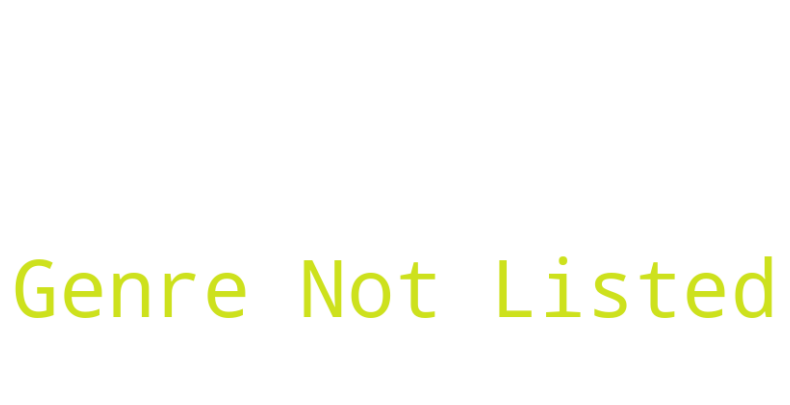

In [ ]:
# visualize movie_genre using wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a dictionary of words and their frequencies
word_counts = {}
for genre, count in top_movies_genres.items(): # Iterate over items to get both genre and count
  word_counts[str(genre)] = count  # Convert genre to string

# Create a wordcloud object
wordcloud = WordCloud(width=800, height=400, background_color="white")

# Generate the wordcloud
wordcloud.generate_from_frequencies(word_counts)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###  **Tv shows**

In [ ]:
# Top Movies Genres
top_tv_shows_genres = filtered_df_tv_shows['Genre'].explode().value_counts()
print("Top Tv shhows Genres:")
print(top_tv_shows_genres)

Top Tv shhows Genres:
Genre
Genre Not Listed    51
Name: count, dtype: int64


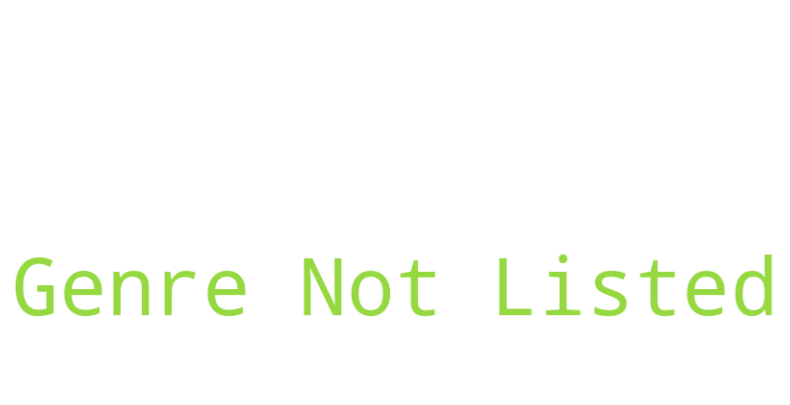

In [ ]:
# Create a dictionary of words and their frequencies
word_counts = {}
for genre, count in top_tv_shows_genres.items(): # Iterate over items to get both genre and count
  word_counts[str(genre)] = count  # Convert genre to string

# Create a wordcloud object
wordcloud = WordCloud(width=800, height=400, background_color="white")

# Generate the wordcloud
wordcloud.generate_from_frequencies(word_counts)

# Display the wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:

# Funtion for Finding  Movies / Tv Shows Predominant Streaming Service

def streaming_distribution_wordcloud(df):
    # Filter streaming information available
    streaming_platforms = df[df['Streaming Platform'] != 'Not Available for Streaming.']['Streaming Platform']

    # Create a string of streaming platforms
    streaming_text = ' '.join(streaming_platforms)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(streaming_text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Streaming Service Distribution - Word Cloud')
    plt.show()

    # Identify the predominant streaming service
    predominant_service = streaming_platforms.mode().iloc[0]
    print(f"The Most predominant streaming service is: {predominant_service}")


### Movies

In [ ]:
# show Movies Predominant Streaming Platform using Word Cloud

streaming_distribution_wordcloud(filtered_df_movies)

ValueError: We need at least 1 word to plot a word cloud, got 0.

### Tv shows

In [ ]:
# show Movies Predominant Streaming Platform using Word Cloud

streaming_distribution_wordcloud(filtered_df_tv_shows)

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format

df_movies.to_csv('Final_Movies_Data.csv', index=False)
df_tv.to_csv('Final_Tv_Shows_Data.csv', index=False)

In [ ]:
#saving filter data as Filter Data in csv format

filtered_df_movies.to_csv('Filtered_Movies_Data.csv', index=False)
filtered_df_tv_shows.to_csv('Filtered_Tv_Shows_Data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

**Final movies data link :**  https://drive.google.com/file/d/1v6k2baVTA2J3vR9zRYx99aXg4c0RQJ6n/view?usp=sharing

**Final Tv shows data link :**  https://drive.google.com/file/d/1_TIMOQwNDPdAhxDdhR9hh97xzJefgWIZ/view?usp=sharing


**Filtered Movies Data:**  https://drive.google.com/file/d/14CQ9tKV46-TCeSu6wmcJRvWqS-AEC5Ks/view?usp=sharing

**Filtered Tv shows Data:** https://drive.google.com/file/d/16IJXPduoG_8LVxT5a3F3AX6iVtvl1k4O/view?usp=sharing

**GitHub Link:**  https://github.com/yrb1802/EDA_Hotel_Booking_Analysis/blob/768aa29407b19c7316bd549a70204ba01a72db17/Mid_course_Module_2_Yashraj.ipynb

# ***Congratulations!!! You have completed your Assignment.***